In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("1-studyhours.csv")

In [3]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [5]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


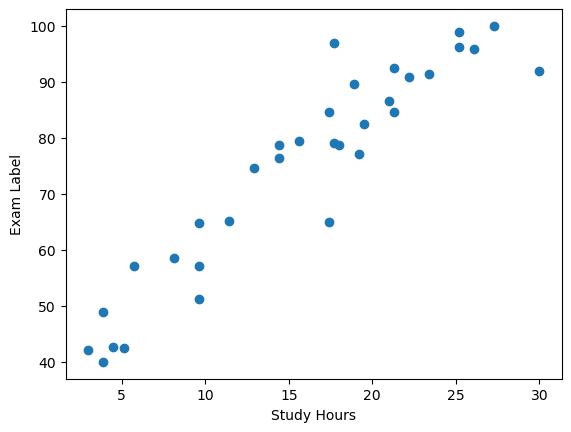

In [6]:
plt.scatter(df["Study Hours"], df["Exam Score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Label")
plt.show()  #pozitif korelasyon olduğu anlaşıldı

In [10]:
#independent and dependent features
X = df[["Study Hours"]]  #girdiyi dataframe vermeliyiz
y = df["Exam Score"]

In [11]:
type(X)

pandas.core.frame.DataFrame

In [12]:
type(y)

pandas.core.series.Series

In [13]:
#test-train-split     train:eğitim

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =15)

In [16]:
y_train  #%80

18     64.9
1      57.1
2      42.7
32     89.6
6      77.1
3      65.1
29     82.4
26     64.8
9      84.6
4      78.7
28     79.1
10     92.4
27     79.5
13    100.0
17     74.7
15     97.0
22     76.5
31     96.2
11     95.9
7      90.8
0      40.0
23     42.2
5      78.8
12     92.0
21     58.5
8      99.0
Name: Exam Score, dtype: float64

In [17]:
y_test   #%20

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [18]:
#standardize the data set

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [22]:
scaler = StandardScaler()  #kolonlar arasındaki büyük farklılıkları gidermek için kullanırız

In [23]:
X_train = scaler.fit_transform(X_train)   # modelin x_test ile ilgili hiçbir şey bilmesini istemiyoruz
X_test = scaler.transform(X_test)  #o yuzden fit deyip standart sapma, mü vs hesaplatmıyoruz (data leakage)

In [24]:
X_train

array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

In [29]:
#modeli eğitmek

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regression = LinearRegression()

In [32]:
regression.fit(X_train ,y_train)  #eğitmek için fit i kullanırız

LinearRegression()

In [33]:
print("Coefficient", regression.coef_)
print("Intercept", regression.intercept_)

Coefficient [16.17860223]
Intercept 76.9076923076923


In [34]:
# yani denklem   y  = 76.90 + 16.17x

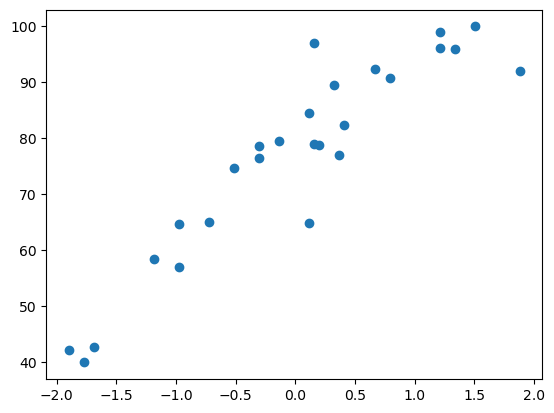

In [35]:
plt.scatter(X_train, y_train)
plt.show()

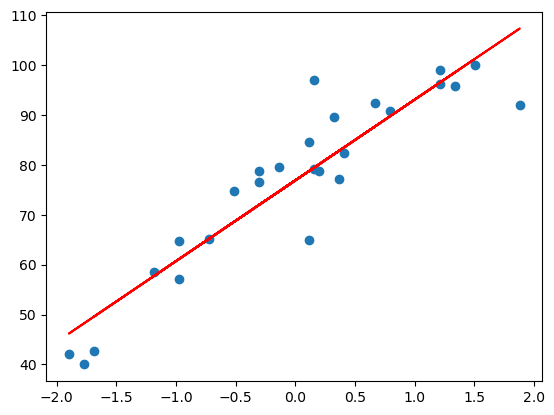

In [36]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), "r")
plt.show()

In [37]:
# 20 girdinin çıktısını tahmin etmeye çalışalım  x=20, y=?

In [41]:
regression.predict([[20]]) # [[]] istedi çünkü x dframe   #scale edilmemiş girdi verdik 400 çıktı

array([400.47973694])

In [42]:
regression.predict(scaler.transform([[20]]))  # 20 saat çalışan biri 84 alır

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [43]:
regression.predict(scaler.transform([[3]]))  # 3 saat çalışan biri 46 alır hatalar sıkıntı değil

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([46.19405223])

In [44]:
#düzgün çalışıp çalışmadığını nasıl anlarız, başarı metrikleri nelerdir?

In [46]:
#prediction with test data

In [49]:
y_pred_test = regression.predict(X_test) #kendi tahminlerimle alttaki y_testi kıyaslayabilirim

In [50]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print("mse", mse)
print("mae", mae)
print("rmse", rmse)

mse 29.45839048833392
mae 4.054868128856142
rmse 5.427558427906043


In [53]:
r2 = r2_score(y_test, y_pred_test)  #% 91 çıktı
print("r2 score", r2)

r2 score 0.9196596206825491
